# Notebook following meeting on Wednesday 28 November

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 
import os
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [14]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')

## Check the proper spherical frame separations $\theta$ are identical to our Euclidian form

In [15]:
def theta_euc(ra, dec):
    thetaij = np.sqrt(np.subtract.outer(ra, ra)**2 + np.subtract.outer(dec, dec)**2)
    return thetaij
def theta_halley(ra, dec):
    thetaij = np.sqrt((np.subtract.outer(ra, ra)*np.cos(0.5*np.add.outer(dec, dec)))**2 + np.subtract.outer(dec, dec)**2)
    return thetaij

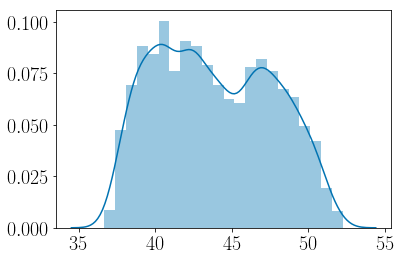

In [25]:
sns.distplot(df.dec.values)

In [16]:
t1 = theta_euc(df.ra.values, df.dec.values)
t2 = theta_halley(df.ra.values, df.dec.values)

In [17]:
f1 = np.tril(t1).flatten()
f1 = f1[np.where(f1 != 0.0)]
f2 = np.tril(t2).flatten()
f2 = f2[np.where(f2 != 0.0)]

Text(0.5,0,'Angular Separation (deg)')

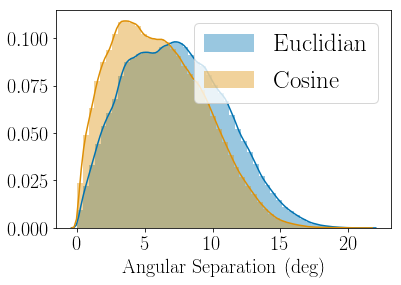

In [18]:
sns.distplot(f1, label='Euclidian')
sns.distplot(f2, label='Cosine')
plt.legend(fontsize=25)
plt.xlabel('Angular Separation (deg)')

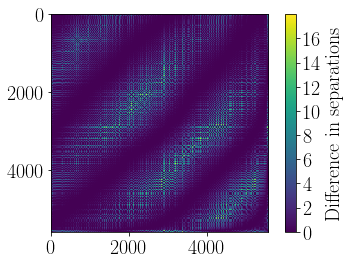

In [19]:
plt.imshow(t1 - t2)
plt.colorbar(label='Difference in separations')
plt.show()

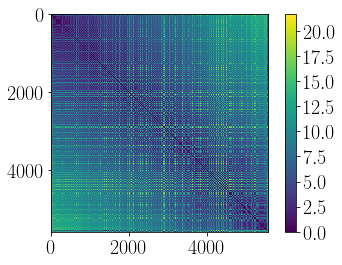

In [20]:
plt.imshow(t1)
plt.colorbar()

Conclusions... needs some more thought?

## Monte Carlo the uncertainties on our $f_{\Delta\nu}$ values

In [21]:
import sys
sys.path.append(os.path.expanduser('~')+'/PhD/Hacks_and_Mocks/asfgrid/')
import asfgrid

def get_fdnu(teff, logz, dnu, numax):
    asf = asfgrid.Seism()
    evstate = np.ones(len(teff))*2

    mass, radius = asf.get_mass_radius(evstate, logz, teff, dnu, numax)
    logg = asf.mr2logg(mass, radius)
    fdnu = asf._get_fdnu(evstate, logz, teff, mass, logg, fill_value='nearest')

    return fdnu

In [22]:
from sklearn.utils import shuffle
sdf = shuffle(df, random_state=24601).reset_index()


Median :1.00464693645
StdDev :0.0011121078395
Fractional Sig : 0.110696384884

Median :1.00172079726
StdDev :0.00110132608261
Fractional Sig : 0.109943417929

Median :1.00395083813
StdDev :0.00509132544565
Fractional Sig : 0.50712896013

Median :1.00500184192
StdDev :0.000695087098066
Fractional Sig : 0.0691627685718

Median :1.00201050496
StdDev :0.00152811582922
Fractional Sig : 0.152504970922

Median :1.004892723
StdDev :0.000492145029082
Fractional Sig : 0.0489748823747

Median :1.00482114041
StdDev :0.00299427122702
Fractional Sig : 0.297990468811

Median :1.00170119002
StdDev :0.000502985027613
Fractional Sig : 0.0502130807693

Median :0.998208013241
StdDev :0.00152527347265
Fractional Sig : 0.152801164929
('outside interp range', 1000, ' out of ', 1000)
('outside interp range', 1000, ' out of ', 1000)

Median :0.999664113105
StdDev :0.000378510319547
Fractional Sig : 0.0378637498921

Median :1.00207110517
StdDev :0.000444477662959
Fractional Sig : 0.0443559005608

Median :1.002

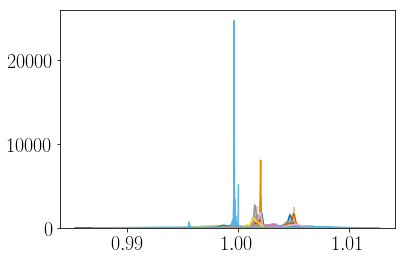

In [23]:
npts = 1000
fdnufracs = []
for idx in range(20):
    teff = np.random.randn(npts)*sdf.Teff_err.values[idx] + sdf.Teff.values[idx]
    logz = np.ones(npts) * np.log10(sdf.Z.values[idx])
    dnu = np.ones(npts) * sdf.dnu.values[idx]
    numax = np.ones(npts) * sdf.numax.values[idx]

    fdnus = get_fdnu(teff, logz, dnu, numax)
    print('\nMedian :{}'.format(np.median(fdnus)))
    print('StdDev :{}'.format(np.std(fdnus)))
    fdnufracs.append(np.std(fdnus)/np.median(fdnus)*100.)
    print('Fractional Sig : {}'.format(fdnufracs[idx]))
    sns.distplot(fdnus)

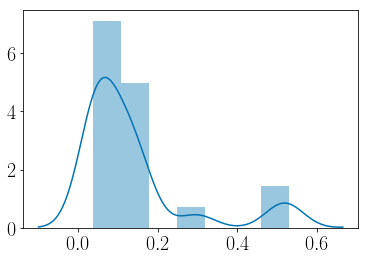

In [24]:
sns.distplot(np.array(fdnufracs))

Conclusions: The fractional uncertainties are not small enough to reasonably ignore when implementation is so simple.

Whats more, the monte-carlo'd uncertainties can in some cases cover the systematic uncertainty due to choice of $f_{\Delta\nu}$

## Monte Carlo the uncertainties on our Bolometric Corrections

...